First, I imported the necessary libraries, such as cv2 for Image Processing, which includes image reading and the process of histogram equalization, numpy for array creation, and pyplot module from the matplotlib library to visualize the histogram.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

To read the existing image, I use cv2.imread, fill with the filename from its folder.

In [2]:
image = cv2.imread('image.png', 0)

Next, I took the data in the form of width and height from the image using .shape.

In [3]:
width, height = image.shape
print (width, height)

933 1400


An empty array of the image's width and height is created and filled with a value of 0, which is stored in two variables, slicedImageA and slicedImageB.

In [4]:
slicedImageA = np.zeros((width, height), dtype = 'uint8')
slicedImageB = np.zeros((width, height), dtype = 'uint8')

According to the graph on question 1A on the left, I changed the intensity value for the slicedImageA variable at the interval [60:100] to 255 or white, and the intensity value for the other interval to 0 or black.

In [5]:
for i in range(width):
    for j in range(height):
        if image[i,j] > 60 and image[i,j] < 100:
            slicedImageA[i,j] = 255
        else:
            slicedImageA[i,j] = 0

Contrarily, I simply modified the intensity value for the slicedImageB variable at intervals [60:100] alone to 255 or white and kept the rest unchanged from the original image, as seen by the graph on question 1A on the right.

In [6]:
for i in range(width):
    for j in range(height):
        if image[i,j] > 60 and image[i,j] < 100:
            slicedImageB[i,j] = 255
        else:
            slicedImageB[i,j] = image[i, j]

After that, pyplot module will be used to compare the three photos side by side.

Text(0.5, 1.0, 'Sliced Image B')

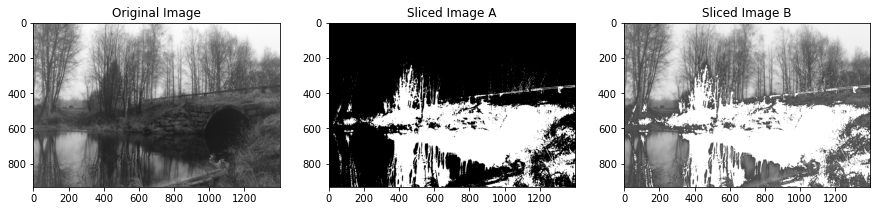

In [7]:
figure = plt.figure(figsize = (15, 10))

figure.add_subplot(1, 3, 1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')

figure.add_subplot(1, 3, 2)
plt.imshow(slicedImageA, cmap = 'gray')
plt.title('Sliced Image A')

figure.add_subplot(1, 3, 3)
plt.imshow(slicedImageB, cmap = 'gray')
plt.title('Sliced Image B')

In response to question 1B, I will use the Histogram Equalization Process to adjust the contrast value of an image. You can carry out this process by utilizing the cv2 library with the equalizeHist module.

In [8]:
equalizedImage = cv2.equalizeHist(image)

Finally, the original and corrected images will be displayed alongside the histogram so that they can be compared.

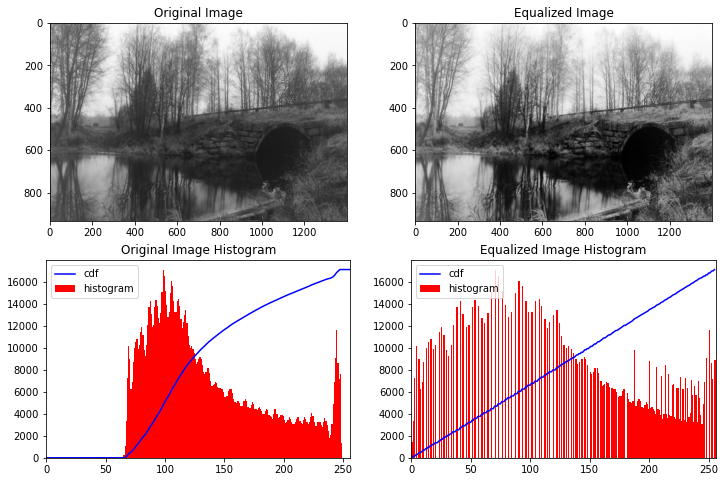

In [9]:
figure = plt.figure(figsize = (12, 8))

figure.add_subplot(2, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')

figure.add_subplot(2, 2, 2)
plt.imshow(equalizedImage, cmap = 'gray')
plt.title('Equalized Image')

figure.add_subplot(2, 2, 3)
hist, bins = np.histogram(image.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdfNormalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdfNormalized, color = 'b')
plt.hist(image.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.title('Original Image Histogram')
plt.legend(('cdf', 'histogram'), loc = 'upper left')

figure.add_subplot(2, 2, 4)
hist, bins = np.histogram(equalizedImage.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdfNormalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdfNormalized, color = 'b')
plt.hist(equalizedImage.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.title('Equalized Image Histogram')
plt.legend(('cdf', 'histogram'), loc = 'upper left')

plt.show()